In [1]:
import pandas as pd
import glob

# 데이터 파일 경로 패턴
file_pattern = '../data/stock_sentiment_*.csv'

# 모든 파일 경로 가져오기
file_paths = glob.glob(file_pattern)

# 각 파일을 데이터프레임으로 로드
dfs = {}
for file_path in file_paths:
    # 파일명에서 종목코드 추출
    stock_code = file_path.split('_')[-1].split('.')[0]
    # 데이터프레임으로 로드
    dfs[stock_code] = pd.read_csv(file_path, encoding='utf-8')

# 각 데이터프레임 확인
for code, df in dfs.items():
    print(f"\n종목코드 {code} 데이터:")
    print(f"행 수: {len(df)}")



종목코드 006400 데이터:
행 수: 13274

종목코드 009830 데이터:
행 수: 5557

종목코드 064760 데이터:
행 수: 64

종목코드 186230 데이터:
행 수: 173

종목코드 461300 데이터:
행 수: 467


In [2]:
# 데이터 파일 경로 패턴
price_file_pattern = '../data/stock_price_*.csv'

# 모든 파일 경로 가져오기
price_file_paths = glob.glob(price_file_pattern)

# 각 파일을 데이터프레임으로 로드
price_dfs = {}
for file_path in price_file_paths:
    # 파일명에서 종목코드 추출
    stock_code = file_path.split('_')[-1].split('.')[0]
    # 데이터프레임으로 로드
    price_dfs[stock_code] = pd.read_csv(file_path, encoding='utf-8')

# 각 데이터프레임 확인
for code, df in price_dfs.items():
    print(f"\n종목코드 {code} 데이터:")
    print(f"행 수: {len(df)}")



종목코드 006400 데이터:
행 수: 42

종목코드 009830 데이터:
행 수: 42

종목코드 064760 데이터:
행 수: 41

종목코드 186230 데이터:
행 수: 41

종목코드 ^KQ11 데이터:
행 수: 42

종목코드 ^KS11 데이터:
행 수: 42


In [3]:
df009830 = dfs['009830']

df009830['텍스트'] = df009830['제목'] + '\n' + df009830['본문']

df009830.head()


,일자,시각,제목,본문,댓글 수,닉네임,조회수,공감수,비공감수,텍스트
0,2025.04.27,16:39,내일 폭등!! 한화솔루션 태양광 호재 전...,한화솔루션 및 태양광 에너지 주가 폭등이유!!\n트럼프 관세 정책 태양광 관세 철폐...,0,xord****,5,0,0,내일 폭등!! 한화솔루션 태양광 호재 전...\n한화솔루션 및 태양광 에너지 주가 ...
1,2025.04.27,16:36,25일 pre장에서 팔고 머리 한대 세게...,24(목) 종가 27100원\n25(금) 8시 시작하여 밀고 당기고 씨름을 하는\n...,0,ty******,17,0,0,25일 pre장에서 팔고 머리 한대 세게...\n24(목) 종가 27100원\n25...
2,2025.04.27,16:08,per1,50% 올리고도 고작 per1이다 조정? 당연히 있겠지 휩쓸려 털면 바보고...대기...,1,rmsq****,107,2,1,per1\n50% 올리고도 고작 per1이다 조정? 당연히 있겠지 휩쓸려 털면 바보...
3,2025.04.27,15:59,내가 주포면...,금욜 개인들 많이 나갔으니\n\n그냥 훈장달아도\n\n쭉 올릴 것같은데\n\n개인 ...,0,newp****,72,2,0,내가 주포면...\n금욜 개인들 많이 나갔으니\n\n그냥 훈장달아도\n\n쭉 올릴 ...
4,2025.04.27,15:45,애초에 단기로 볼생각도 없었음,솔라허브 가동 모멘텀 남아서\n\n하반기까지는 기다려야함 (올해 3분기가 시작점)\...,0,love****,96,4,2,애초에 단기로 볼생각도 없었음\n솔라허브 가동 모멘텀 남아서\n\n하반기까지는 기다...


In [4]:
# 일자와 시각 컬럼을 합쳐서 datetime 형식의 새로운 컬럼 생성
df009830['작성일시'] = pd.to_datetime(df009830['일자'] + ' ' + df009830['시각'].str[:2], format='%Y.%m.%d %H')

df009830.head()

,일자,시각,제목,본문,댓글 수,닉네임,조회수,공감수,비공감수,텍스트,작성일시
0,2025.04.27,16:39,내일 폭등!! 한화솔루션 태양광 호재 전...,한화솔루션 및 태양광 에너지 주가 폭등이유!!\n트럼프 관세 정책 태양광 관세 철폐...,0,xord****,5,0,0,내일 폭등!! 한화솔루션 태양광 호재 전...\n한화솔루션 및 태양광 에너지 주가 ...,2025-04-27 16:00:00
1,2025.04.27,16:36,25일 pre장에서 팔고 머리 한대 세게...,24(목) 종가 27100원\n25(금) 8시 시작하여 밀고 당기고 씨름을 하는\n...,0,ty******,17,0,0,25일 pre장에서 팔고 머리 한대 세게...\n24(목) 종가 27100원\n25...,2025-04-27 16:00:00
2,2025.04.27,16:08,per1,50% 올리고도 고작 per1이다 조정? 당연히 있겠지 휩쓸려 털면 바보고...대기...,1,rmsq****,107,2,1,per1\n50% 올리고도 고작 per1이다 조정? 당연히 있겠지 휩쓸려 털면 바보...,2025-04-27 16:00:00
3,2025.04.27,15:59,내가 주포면...,금욜 개인들 많이 나갔으니\n\n그냥 훈장달아도\n\n쭉 올릴 것같은데\n\n개인 ...,0,newp****,72,2,0,내가 주포면...\n금욜 개인들 많이 나갔으니\n\n그냥 훈장달아도\n\n쭉 올릴 ...,2025-04-27 15:00:00
4,2025.04.27,15:45,애초에 단기로 볼생각도 없었음,솔라허브 가동 모멘텀 남아서\n\n하반기까지는 기다려야함 (올해 3분기가 시작점)\...,0,love****,96,4,2,애초에 단기로 볼생각도 없었음\n솔라허브 가동 모멘텀 남아서\n\n하반기까지는 기다...,2025-04-27 15:00:00


tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

c:\Users\wizar\anaconda3\envs\py311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\wizar\.cache\huggingface\hub\models--snunlp--KR-FinBert-SC. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/143k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/294k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/406M [00:00<?, ?B/s]

감성 분석 진행 중...


  0%|          | 11/5557 [00:01<08:30, 10.86it/s]

model.safetensors:   0%|          | 0.00/406M [00:00<?, ?B/s]

100%|██████████| 5557/5557 [10:23<00:00,  8.92it/s]


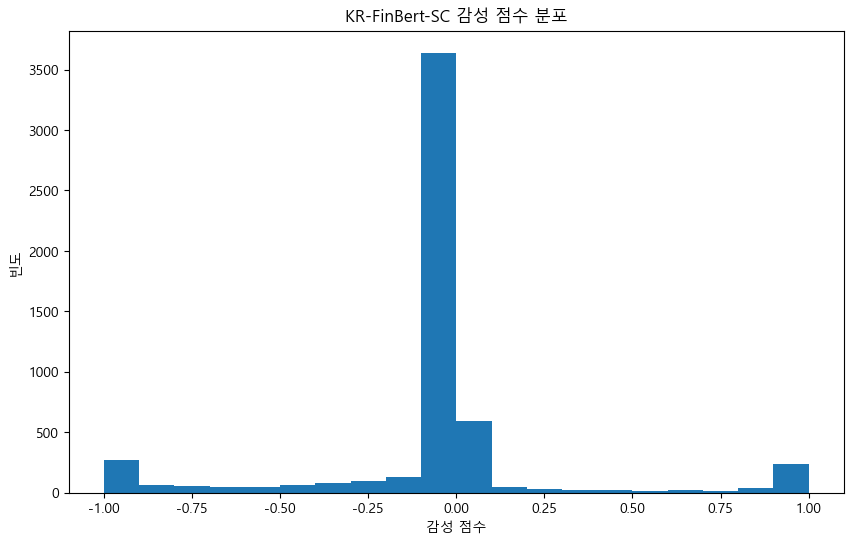

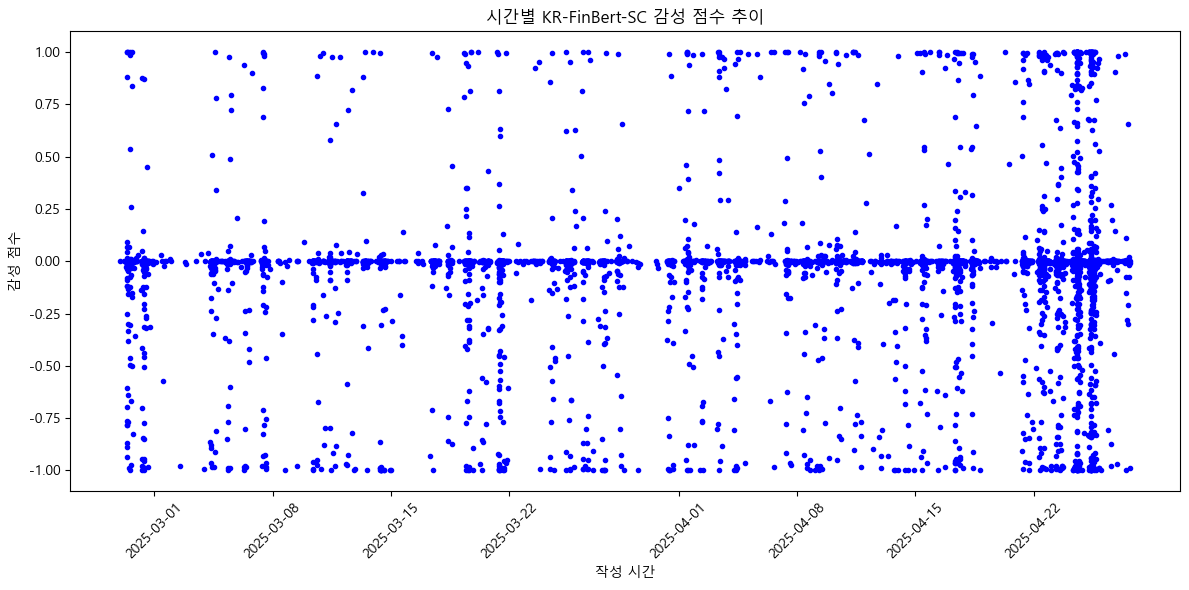

In [5]:
# KR-FinBert-SC를 이용한 감성분석
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# KR-FinBert-SC 모델과 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("snunlp/KR-FinBert-SC")
model = AutoModelForSequenceClassification.from_pretrained("snunlp/KR-FinBert-SC")

def analyze_sentiment(text):
    # NaN 값 처리
    if pd.isna(text):
        return 0
    
    # 문자열로 변환
    text = str(text)
    
    # 토크나이징 및 모델 입력 준비
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    
    # 모델 추론
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        
    # 감성 점수 변환 (-1: 부정, 0: 중립, 1: 긍정)
    score = predictions[0].tolist()
    sentiment_score = score[2] - score[0]  # 긍정 확률 - 부정 확률
    
    return sentiment_score

# 텍스트별 감성 점수 계산 (tqdm으로 진행률 표시)
print("감성 분석 진행 중...")
df009830['sentiment_score'] = [analyze_sentiment(text) for text in tqdm(df009830['텍스트'])]

# 감성 점수 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df009830['sentiment_score'], bins=20)
plt.title('KR-FinBert-SC 감성 점수 분포')
plt.xlabel('감성 점수')
plt.ylabel('빈도')
plt.show()

# 시계열로 감성 점수 추이 시각화
plt.figure(figsize=(12, 6))
plt.plot(df009830['작성일시'], df009830['sentiment_score'], 'b.')
plt.title('시간별 KR-FinBert-SC 감성 점수 추이')
plt.xlabel('작성 시간')
plt.ylabel('감성 점수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
df009830['sentiment_score'] = df009830['sentiment_score'].round(2)

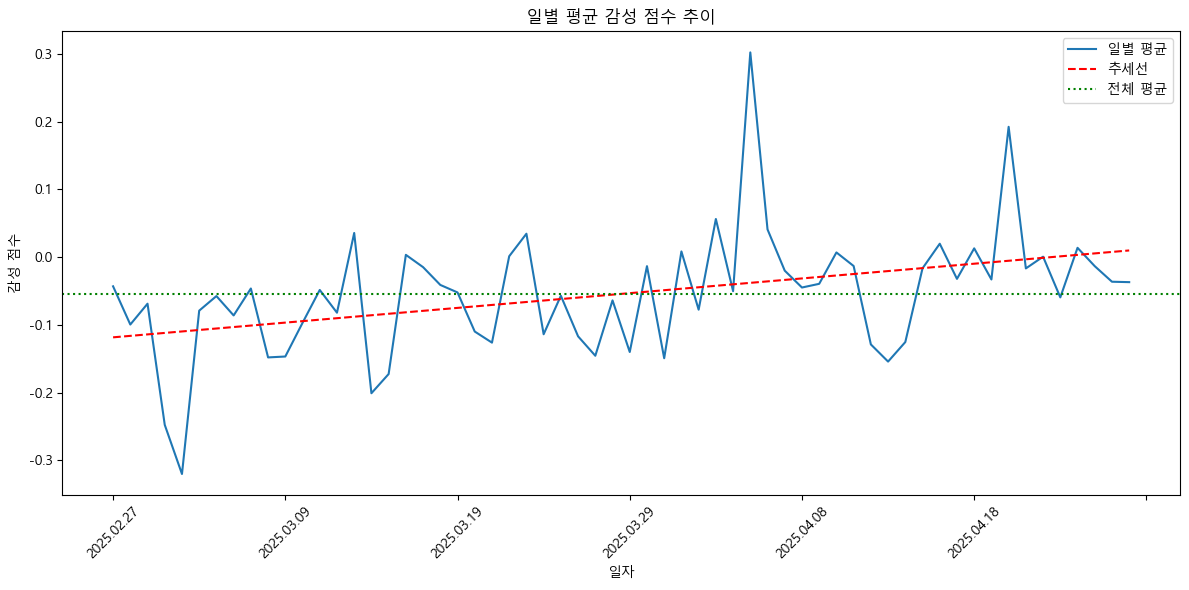

In [11]:
# 일자별 평균 감성 점수 계산
daily_sentiment = df009830.groupby('일자')['sentiment_score'].mean()

# 추세선을 위한 날짜 인덱스를 숫자로 변환
x = np.arange(len(daily_sentiment))
z = np.polyfit(x, daily_sentiment, 1)
p = np.poly1d(z)

# 평균선과 추세선 그리기
plt.figure(figsize=(12, 6))
daily_sentiment.plot(label='일별 평균')
plt.plot(daily_sentiment.index, p(x), "r--", label='추세선')
plt.axhline(y=daily_sentiment.mean(), color='g', linestyle=':', label='전체 평균')
plt.legend()
plt.title('일별 평균 감성 점수 추이')
plt.xlabel('일자')
plt.ylabel('감성 점수')
plt.xticks(rotation=45)
plt.tight_layout()


In [15]:
price009830 = price_dfs['009830']

price009830.head()

,일자,Open,High,Low,Close,Volume,수익률,거래량변화율,당일변동폭,당일변동폭비율
0,2025-02-27,21300.0,23250.0,21300.0,22550.0,9851738,NaN,NaN,1950.0,9.15
1,2025-02-28,22150.0,22550.0,21400.0,21500.0,3060313,-4.66,-68.94,1150.0,5.19
2,2025-03-04,20800.0,22000.0,20500.0,20600.0,2437066,-4.19,-20.37,1500.0,7.21
3,2025-03-05,21100.0,21450.0,20250.0,21050.0,1829330,2.18,-24.94,1200.0,5.69
4,2025-03-06,21300.0,21450.0,20525.0,20600.0,1430819,-2.14,-21.78,925.0,4.34


In [41]:
# 일자별 감성점수와 조회수 집계
sentiment_views = df009830.groupby('일자').agg({
    'sentiment_score': 'mean',
    '조회수': 'sum'
}).reset_index()

# 감성점수를 0~100 점수로 변환 (기존: -1.0 ~ 1.0)
sentiment_views['sentiment_score'] = (sentiment_views['sentiment_score'] + 1) * 50

# 일자 형식 통일 (YYYY-MM-DD로 변환)
sentiment_views['일자'] = pd.to_datetime(sentiment_views['일자'].str.replace('.', '-'))
# price009830['일자'] = pd.to_datetime(price009830['일자'].str.replace('.', '-'))

# price009830과 left join
merged_df = sentiment_views.merge(price009830, on='일자', how='left')

merged_df[:10]


,일자,sentiment_score,조회수,Open,High,Low,Close,Volume,수익률,거래량변화율,당일변동폭,당일변동폭비율
0,2025-02-27,47.845178,26900,21300.0,23250.0,21300.0,22550.0,9851738.0,NaN,NaN,1950.0,9.15
1,2025-02-28,45.025547,19098,22150.0,22550.0,21400.0,21500.0,3060313.0,-4.66,-68.94,1150.0,5.19
2,2025-03-01,46.562500,4766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-02,37.625000,2901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-03,34.000000,1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2025-03-04,46.049383,15527,20800.0,22000.0,20500.0,20600.0,2437066.0,-4.19,-20.37,1500.0,7.21
6,2025-03-05,47.125000,9082,21100.0,21450.0,20250.0,21050.0,1829330.0,2.18,-24.94,1200.0,5.69
7,2025-03-06,45.696429,10190,21300.0,21450.0,20525.0,20600.0,1430819.0,-2.14,-21.78,925.0,4.34
8,2025-03-07,47.683962,13692,20600.0,21950.0,20250.0,21400.0,2330582.0,3.88,62.88,1700.0,8.25
9,2025-03-08,42.600000,4368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# 영업일과 비영업일 구분
business_days = merged_df[merged_df['Volume'].notna()].copy()
non_business_days = merged_df[merged_df['Volume'].isna()].copy()

# 각 비영업일에 대해 이전 영업일 찾기
for idx, row in non_business_days.iterrows():
    # 현재 날짜보다 이전이면서 가장 가까운 영업일 찾기
    prev_business_day = business_days[business_days['일자'] < row['일자']]['일자'].max()
    
    if pd.notna(prev_business_day):
        # 이전 영업일의 데이터에 현재 비영업일의 데이터 합산
        business_days.loc[business_days['일자'] == prev_business_day, 'sentiment_score'] = (
            (business_days.loc[business_days['일자'] == prev_business_day, 'sentiment_score'].values[0] + 
             row['sentiment_score']) / 2
        )
        business_days.loc[business_days['일자'] == prev_business_day, '조회수'] += row['조회수']

# 결과 정렬
business_days = business_days.sort_values('일자').reset_index(drop=True)

# 결과 확인
print("비영업일 데이터가 통합된 결과:")
business_days[:10]


비영업일 데이터가 통합된 결과:


,일자,sentiment_score,조회수,Open,High,Low,Close,Volume,수익률,거래량변화율,당일변동폭,당일변동폭비율
0,2025-02-27,47.845178,26900,21300.0,23250.0,21300.0,22550.0,9851738.0,NaN,NaN,1950.0,9.15
1,2025-02-28,37.854756,27792,22150.0,22550.0,21400.0,21500.0,3060313.0,-4.66,-68.94,1150.0,5.19
2,2025-03-04,46.049383,15527,20800.0,22000.0,20500.0,20600.0,2437066.0,-4.19,-20.37,1500.0,7.21
3,2025-03-05,47.125000,9082,21100.0,21450.0,20250.0,21050.0,1829330.0,2.18,-24.94,1200.0,5.69
4,2025-03-06,45.696429,10190,21300.0,21450.0,20525.0,20600.0,1430819.0,-2.14,-21.78,925.0,4.34
5,2025-03-07,43.904324,21874,20600.0,21950.0,20250.0,21400.0,2330582.0,3.88,62.88,1700.0,8.25
6,2025-03-10,45.148438,10170,21400.0,21400.0,20400.0,20800.0,1595522.0,-2.80,-31.54,1000.0,4.67
7,2025-03-11,47.575758,10802,20100.0,20300.0,19860.0,20150.0,1694386.0,-3.12,6.20,440.0,2.19
8,2025-03-12,45.898305,9736,20200.0,20700.0,20200.0,20400.0,1168511.0,1.24,-31.04,500.0,2.48
9,2025-03-13,51.779070,10234,20400.0,20750.0,20200.0,20350.0,1247482.0,-0.25,6.76,550.0,2.70


감성점수와 다음날 수익률의 상관계수: 0.2832


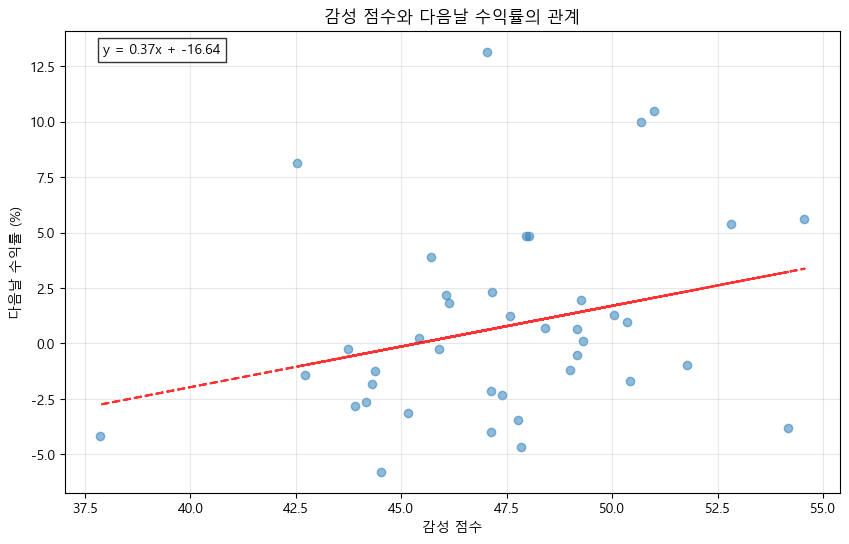

In [43]:
# 다음 영업일의 수익률을 현재 행에 추가
business_days['next_day_return'] = business_days['수익률'].shift(-1)

# 감성점수와 다음날 수익률 간의 상관계수 계산
correlation = business_days['sentiment_score'].corr(business_days['next_day_return'])

print(f"감성점수와 다음날 수익률의 상관계수: {correlation:.4f}")

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(business_days['sentiment_score'], business_days['next_day_return'], alpha=0.5)
plt.xlabel('감성 점수')
plt.ylabel('다음날 수익률 (%)')
plt.title('감성 점수와 다음날 수익률의 관계')

# 추세선 추가
z = np.polyfit(business_days['sentiment_score'], business_days['next_day_return'].fillna(0), 1)
p = np.poly1d(z)
plt.plot(business_days['sentiment_score'], p(business_days['sentiment_score']), "r--", alpha=0.8)

# 회귀식 텍스트 추가
equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()


감성점수와 다음날 초과 수익률의 상관계수: 0.3798
결정계수(R²): 0.1443


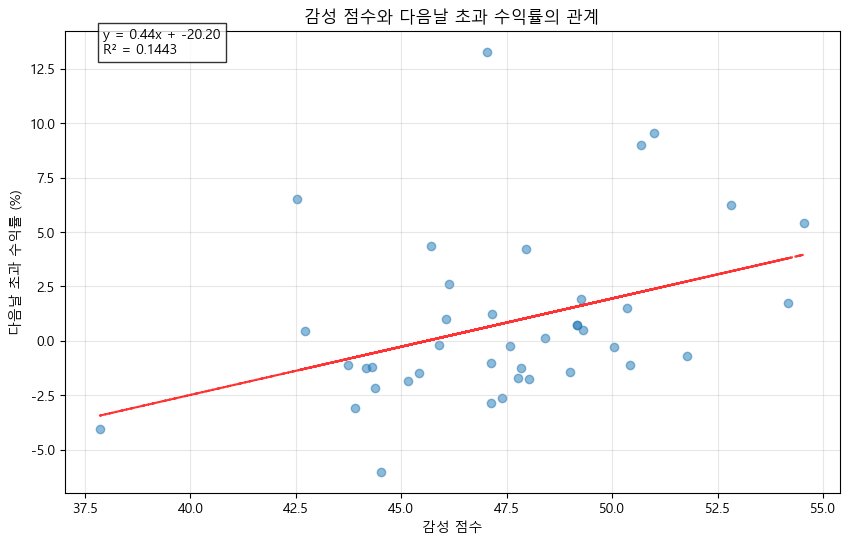

In [47]:
# KOSPI 지수 데이터 불러오기 (예시 - 실제로는 데이터 소스에 맞게 수정 필요)
kospi_data = pd.read_csv('../data/stock_price_^KS11.csv')
kospi_data['일자'] = pd.to_datetime(kospi_data['일자'])
kospi_data = kospi_data.set_index('일자')['Close']

# 주가지수 수익률 계산
kospi_returns = kospi_data.pct_change() * 100

# business_days에 KOSPI 수익률 추가
business_days['kospi_return'] = business_days['일자'].map(lambda x: kospi_returns.get(x, np.nan))

# 초과 수익률 계산 (종목 수익률 - KOSPI 수익률)
business_days['excess_return'] = business_days['수익률'] - business_days['kospi_return']

# 다음날 초과 수익률 계산
business_days['next_day_excess_return'] = business_days['excess_return'].shift(-1)

# 감성점수와 다음날 초과 수익률 간의 상관계수 및 결정계수 계산
correlation_excess = business_days['sentiment_score'].corr(business_days['next_day_excess_return'])
r_squared = correlation_excess ** 2

print(f"감성점수와 다음날 초과 수익률의 상관계수: {correlation_excess:.4f}")
print(f"결정계수(R²): {r_squared:.4f}")

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(business_days['sentiment_score'], business_days['next_day_excess_return'], alpha=0.5)
plt.xlabel('감성 점수')
plt.ylabel('다음날 초과 수익률 (%)')
plt.title('감성 점수와 다음날 초과 수익률의 관계')

# 추세선 추가
z = np.polyfit(business_days['sentiment_score'], business_days['next_day_excess_return'].fillna(0), 1)
p = np.poly1d(z)
plt.plot(business_days['sentiment_score'], p(business_days['sentiment_score']), "r--", alpha=0.8)

# 회귀식과 결정계수 텍스트 추가
equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
r_squared_text = f'R² = {r_squared:.4f}'
plt.text(0.05, 0.95, equation + '\n' + r_squared_text, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()


조회수와 다음날 초과 수익률의 상관계수: 0.3189
결정계수(R²): 0.1017


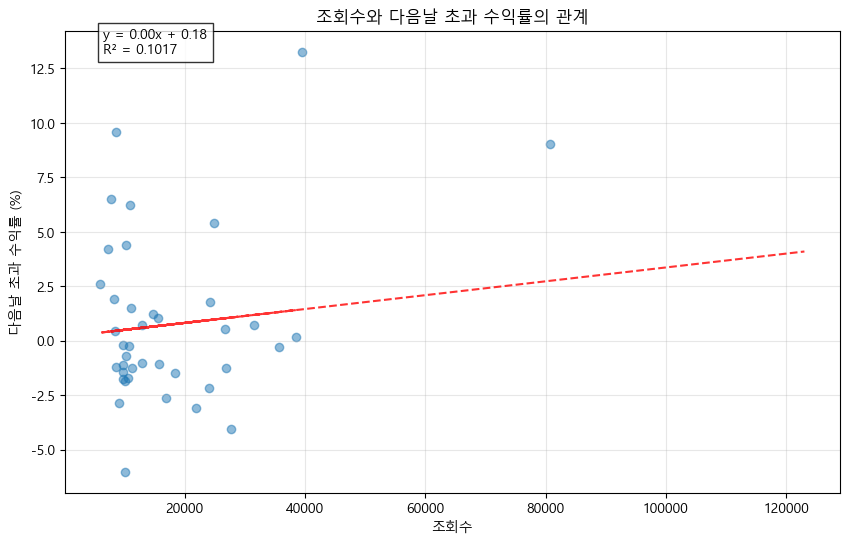

In [48]:
# 조회수와 다음날 초과 수익률 간의 상관계수 및 결정계수 계산
correlation_views = business_days['조회수'].corr(business_days['next_day_excess_return'])
r_squared = correlation_views ** 2

print(f"조회수와 다음날 초과 수익률의 상관계수: {correlation_views:.4f}")
print(f"결정계수(R²): {r_squared:.4f}")

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(business_days['조회수'], business_days['next_day_excess_return'], alpha=0.5)
plt.xlabel('조회수')
plt.ylabel('다음날 초과 수익률 (%)')
plt.title('조회수와 다음날 초과 수익률의 관계')

# 추세선 추가
z = np.polyfit(business_days['조회수'], business_days['next_day_excess_return'].fillna(0), 1)
p = np.poly1d(z)
plt.plot(business_days['조회수'], p(business_days['조회수']), "r--", alpha=0.8)

# 회귀식과 결정계수 텍스트 추가
equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
r_squared_text = f'R² = {r_squared:.4f}'
plt.text(0.05, 0.95, equation + '\n' + r_squared_text, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()


조회수 변화율과 다음날 초과 수익률의 상관계수: -0.0312
결정계수(R²): 0.0010


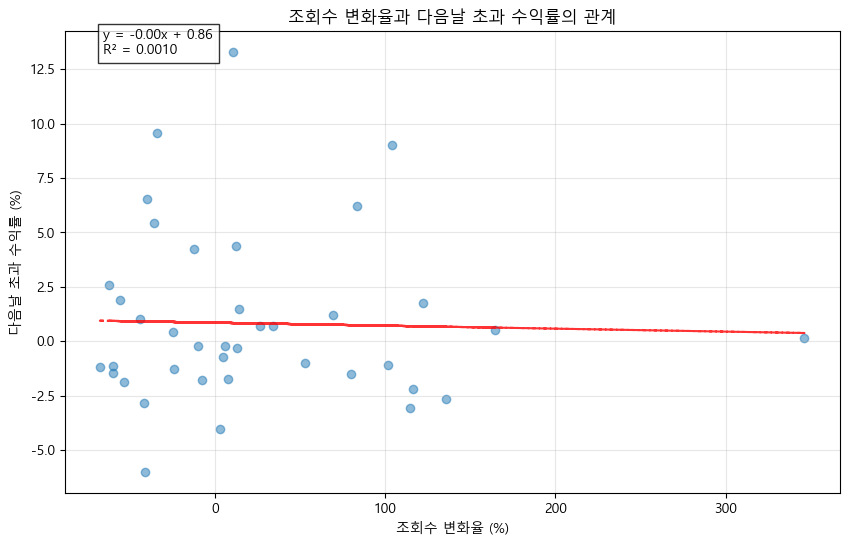

In [49]:
# 조회수 변화율 계산
business_days['조회수_변화율'] = business_days['조회수'].pct_change() * 100

# 조회수 변화율과 다음날 초과 수익률 간의 상관계수 및 결정계수 계산
correlation_views_change = business_days['조회수_변화율'].corr(business_days['next_day_excess_return'])
r_squared = correlation_views_change ** 2

print(f"조회수 변화율과 다음날 초과 수익률의 상관계수: {correlation_views_change:.4f}")
print(f"결정계수(R²): {r_squared:.4f}")

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(business_days['조회수_변화율'], business_days['next_day_excess_return'], alpha=0.5)
plt.xlabel('조회수 변화율 (%)')
plt.ylabel('다음날 초과 수익률 (%)')
plt.title('조회수 변화율과 다음날 초과 수익률의 관계')

# 추세선 추가
z = np.polyfit(business_days['조회수_변화율'].fillna(0), business_days['next_day_excess_return'].fillna(0), 1)
p = np.poly1d(z)
plt.plot(business_days['조회수_변화율'], p(business_days['조회수_변화율']), "r--", alpha=0.8)

# 회귀식과 결정계수 텍스트 추가
equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
r_squared_text = f'R² = {r_squared:.4f}'
plt.text(0.05, 0.95, equation + '\n' + r_squared_text, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()
